In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_players, get_teams, get_training_datasets, get_all_player_features
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
total_points = get_all_player_features(["total_points", "clean_sheets"])
total_points[total_points["name"] == "Aaron Wan-Bissaka"].transpose()

,4,530,1059,1589,2121,2660,3201,3747,4298,4853,...,21899,429,968,1522,2084,3095,3689,4288,4889,5491
name,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,...,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka
opponent,Chelsea,Wolverhampton Wanderers,Crystal Palace,Southampton,Leicester,West Ham,Arsenal,Newcastle United,Liverpool,Norwich,...,Leicester,Crystal Palace,Brighton,Tottenham,Newcastle United,Chelsea,Arsenal,Everton,West Bromwich Albion,Southampton
total_points,8,1,0,2,6,1,0,0,2,1,...,7,0,1,-1,8,6,2,2,8,1
clean_sheets,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [3]:
fpl = await get_fpl()
team_feature_names = ["npxGA"]
teams = get_teams(team_feature_names=team_feature_names, visualize=False)

In [4]:
player_feature_names = ["total_points"]
players = await get_players(player_feature_names, team_feature_names, visualize=False, num_players=590)

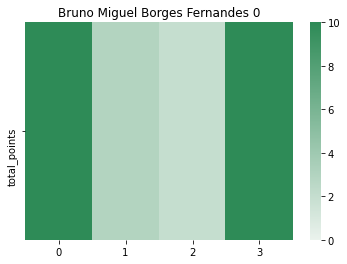

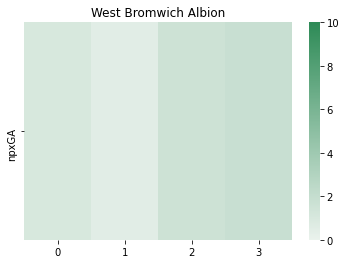

torch.Size([16, 1, 4]) torch.Size([16, 1, 4])
torch.Size([4, 1])


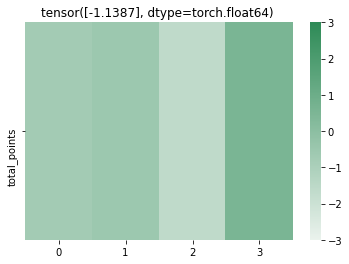

torch.Size([4, 1])


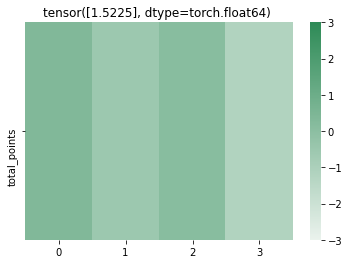

torch.Size([4, 1])


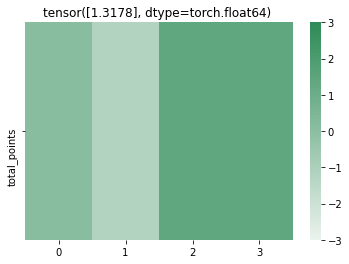

torch.Size([4, 1])


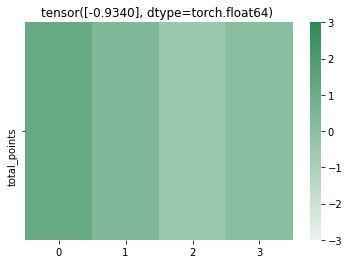

torch.Size([4, 1])


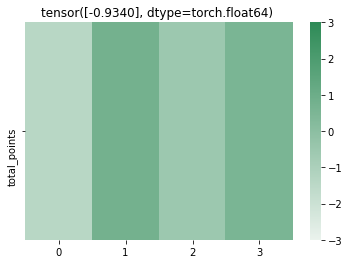

torch.Size([4, 1])


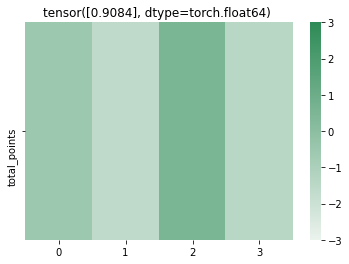

torch.Size([4, 1])


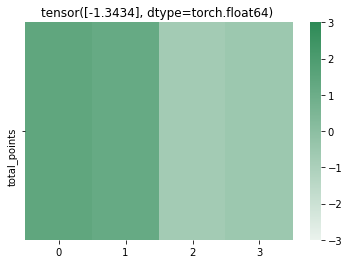

torch.Size([4, 1])


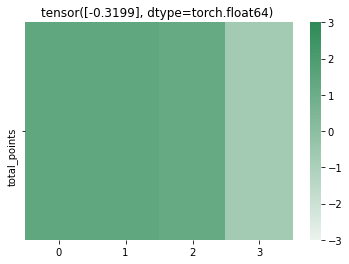

torch.Size([4, 1])


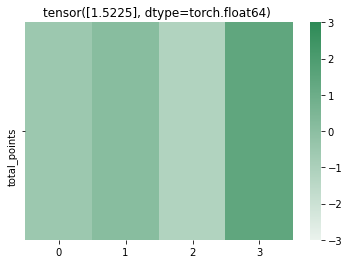

torch.Size([4, 1])


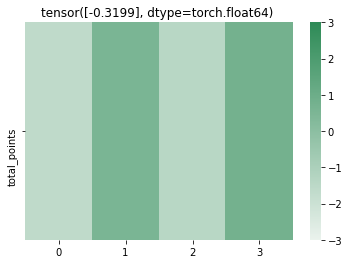

torch.Size([4, 1])


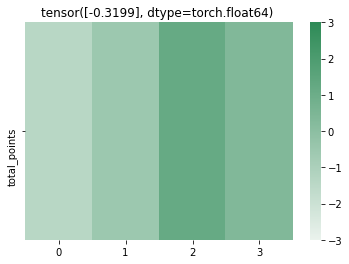

torch.Size([4, 1])


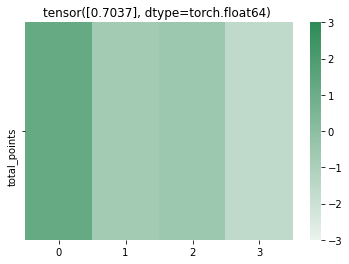

In [5]:
bruno = [player for player in players if "Bruno Miguel" in player.name][0]
bruno.visualize()
train_loader, test_loader, _ = get_training_datasets([bruno], teams, visualize=False)
for player_features, opponent_features, total_points in train_loader:
    for player_feature, opponent_feature, total_point in zip(player_features, opponent_features, total_points):
        print(opponent_feature.shape)
        #predicted_score = (player_feature * opponent_feature).sum()
        plt.title(f"{total_point} ")
        sns.heatmap(player_feature, yticklabels = player_feature_names, cmap = sns.light_palette("seagreen", as_cmap = True), vmin=-3, vmax=3)
        plt.show()
        #sns.heatmap(opponent_feature.reshape((1, 4)), yticklabels=team_feature_names,   cmap = sns.light_palette("seagreen", as_cmap = True), vmin=-3, vmax=3)
        #plt.show()
        

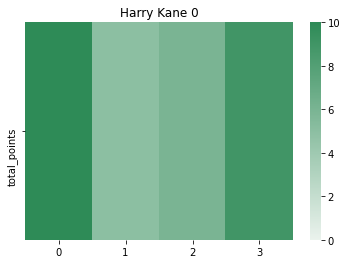

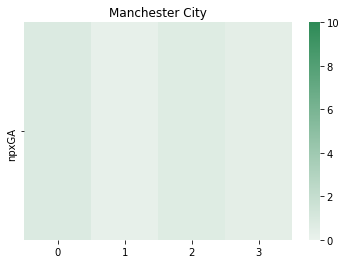

torch.Size([41, 1, 4]) torch.Size([41, 1, 4])


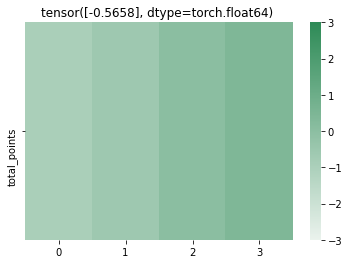

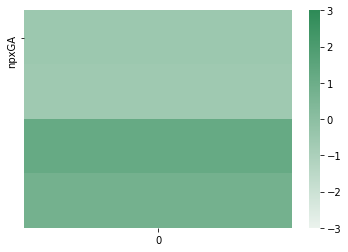

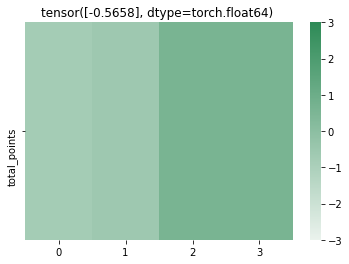

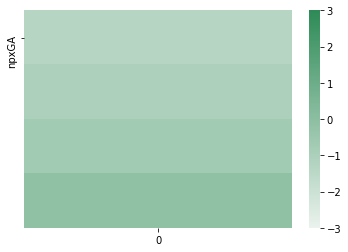

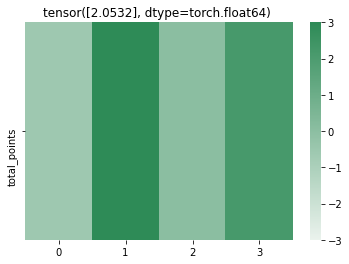

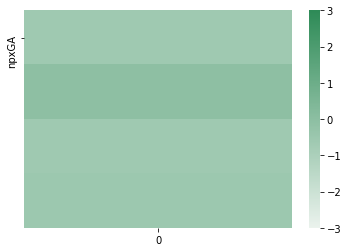

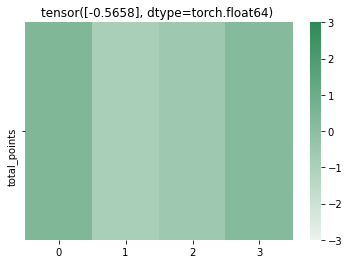

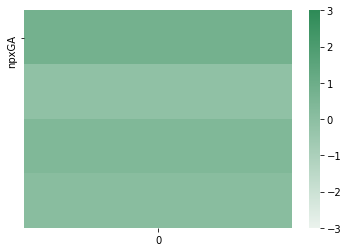

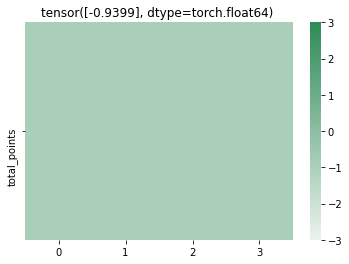

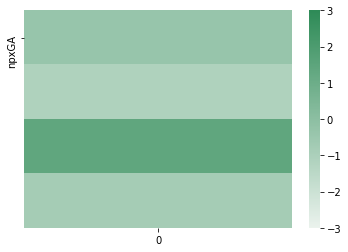

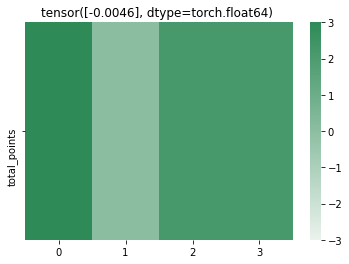

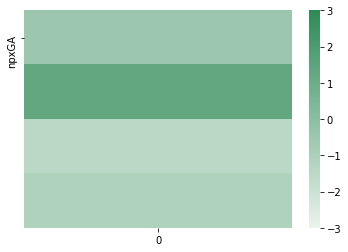

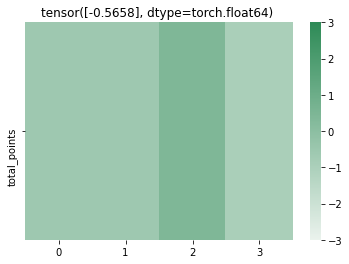

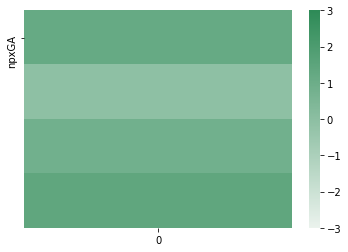

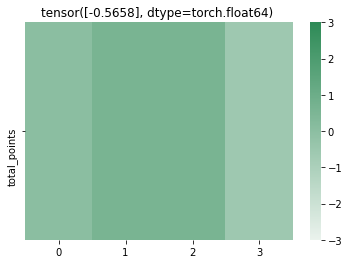

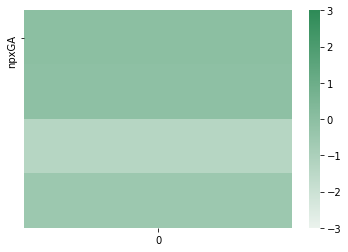

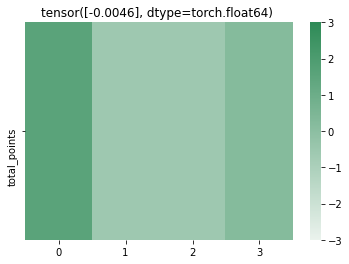

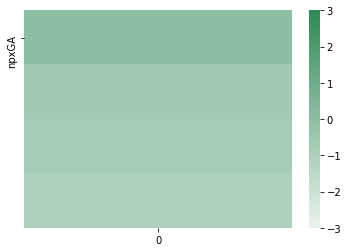

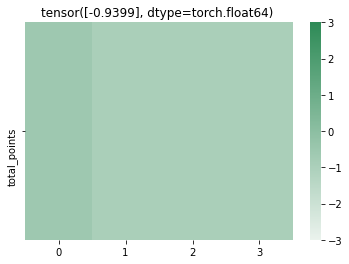

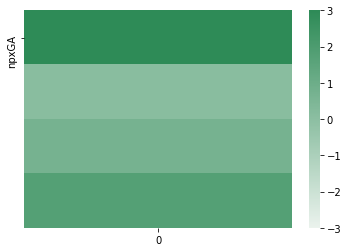

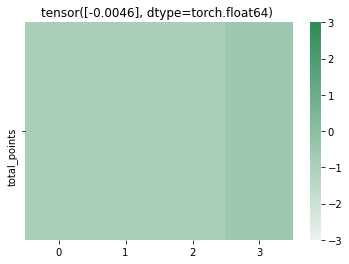

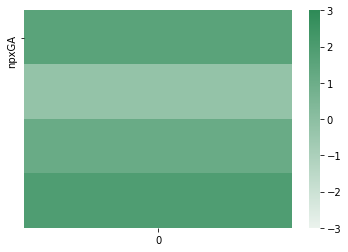

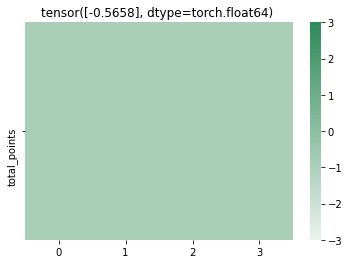

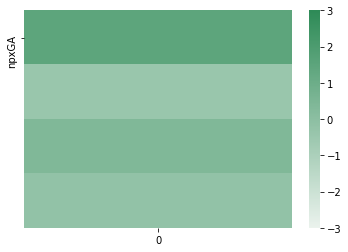

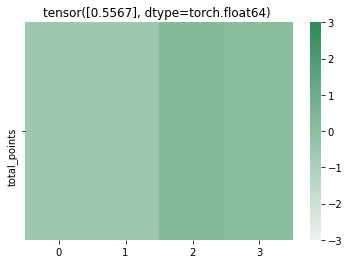

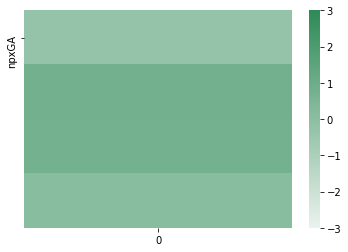

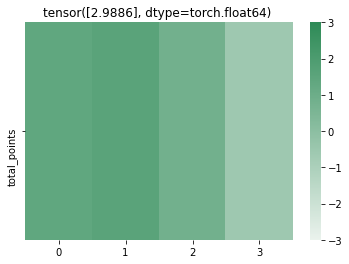

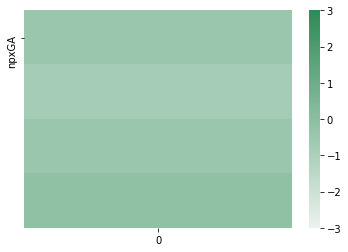

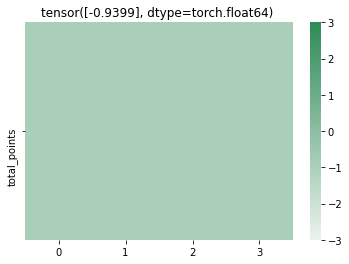

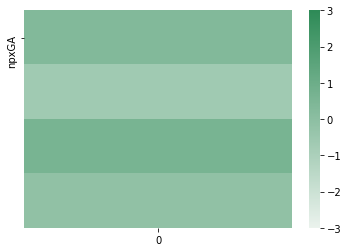

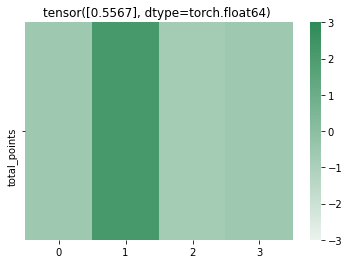

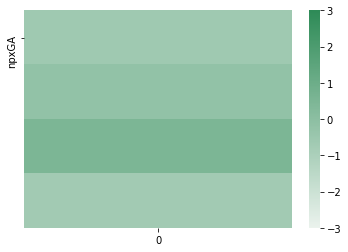

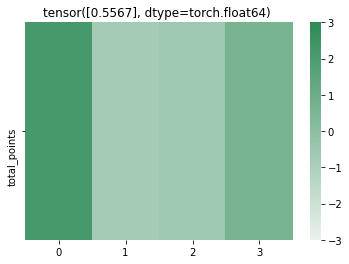

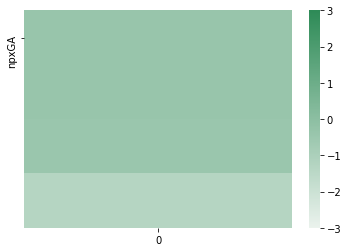

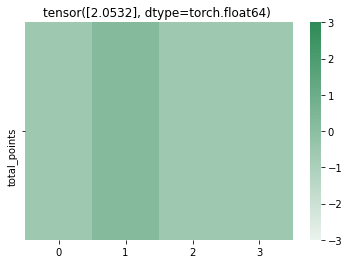

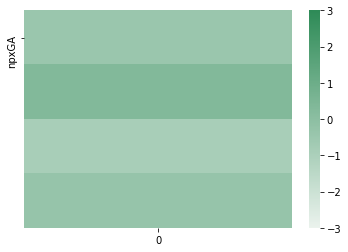

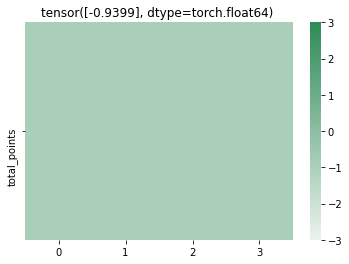

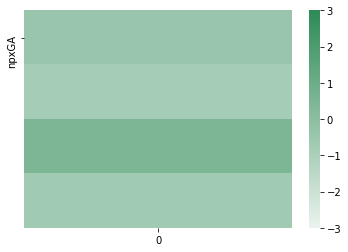

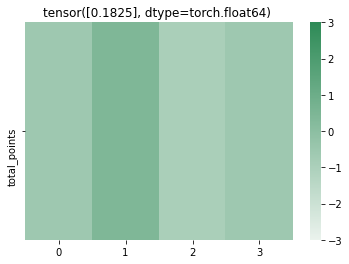

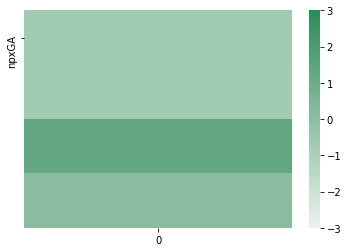

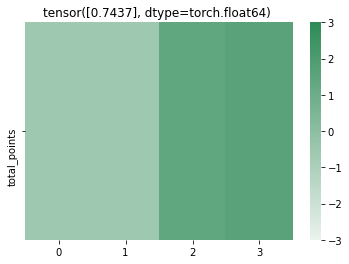

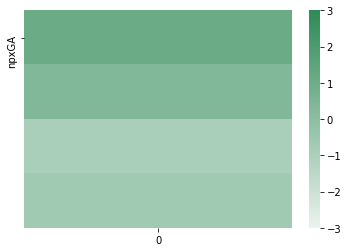

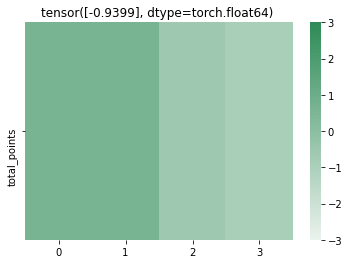

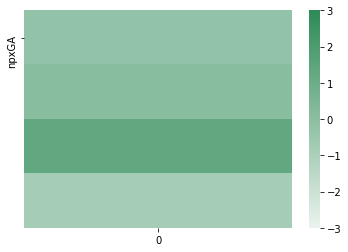

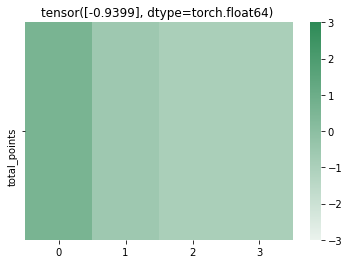

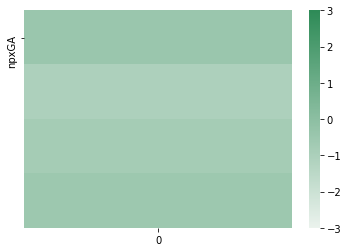

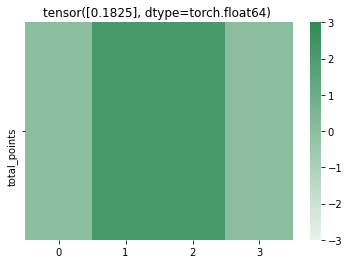

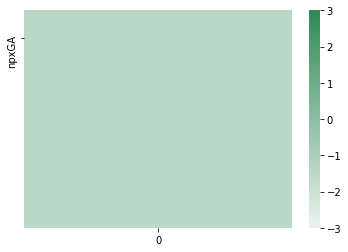

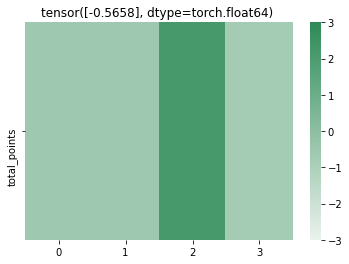

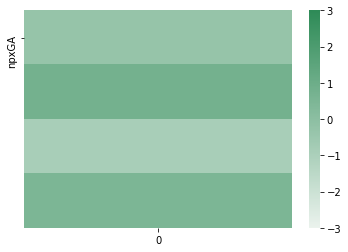

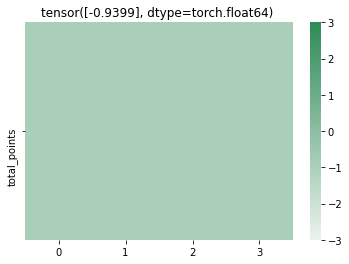

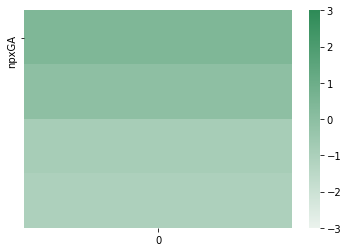

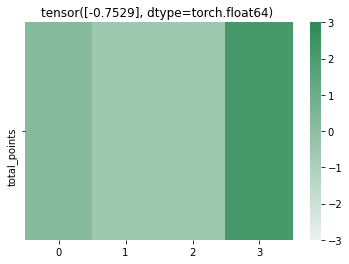

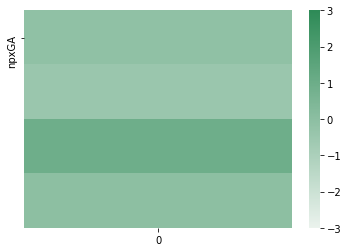

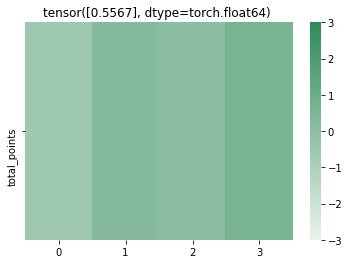

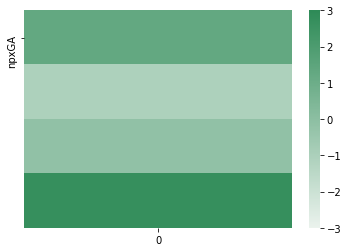

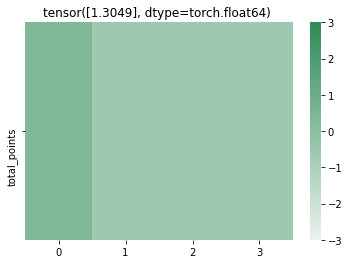

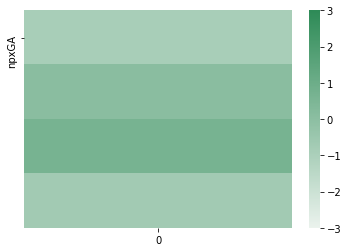

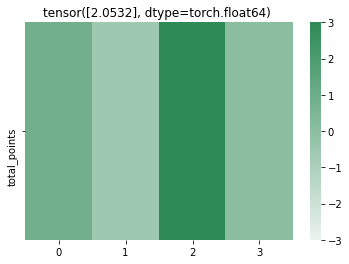

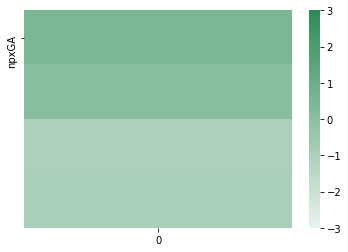

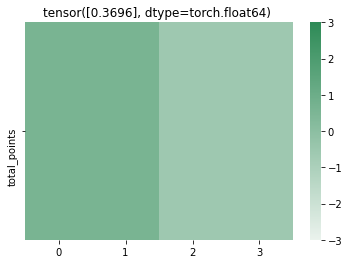

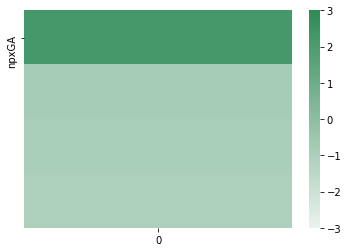

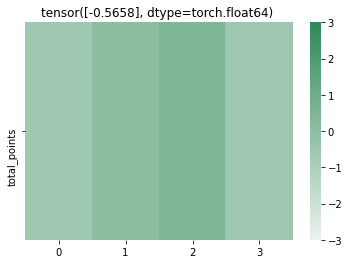

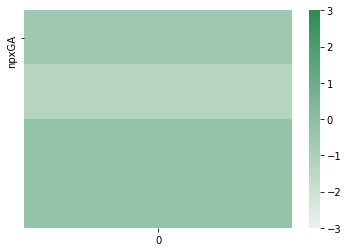

In [6]:
harry = [player for player in players if "Harry Kane" in player.name][0]
harry.visualize()
train_loader, test_loader, _ = get_training_datasets([harry], teams, visualize=False)
for player_features, opponent_features, total_points in train_loader:
    for player_feature, opponent_feature, total_point in zip(player_features, opponent_features, total_points):
        plt.title(f"{total_point} ")
        sns.heatmap(player_feature, yticklabels = player_feature_names, cmap = sns.light_palette("seagreen", as_cmap = True), vmin=-3, vmax=3)
        plt.show()
        sns.heatmap(opponent_feature, yticklabels=team_feature_names,   cmap = sns.light_palette("seagreen", as_cmap = True), vmin=-3, vmax=3)
        plt.show()

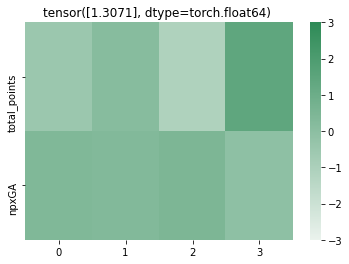

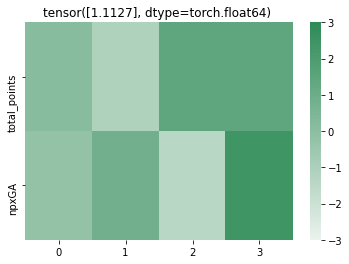

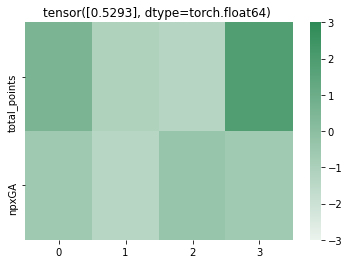

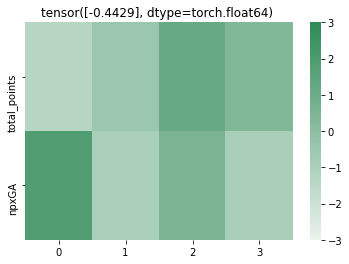

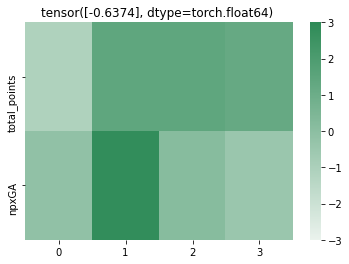

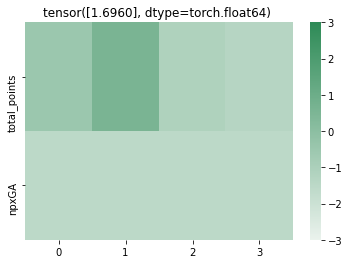

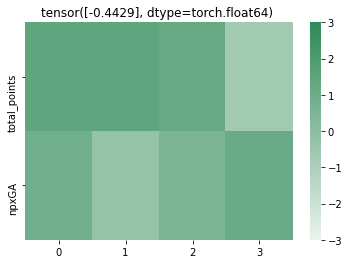

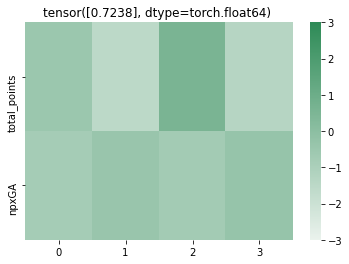

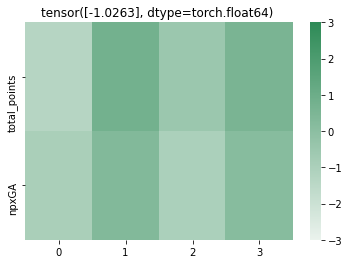

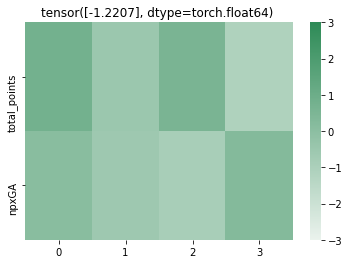

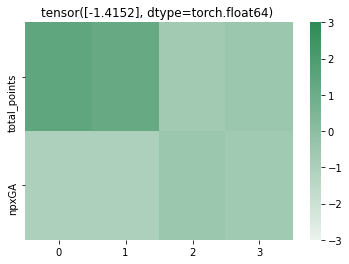

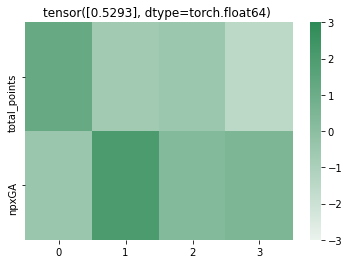

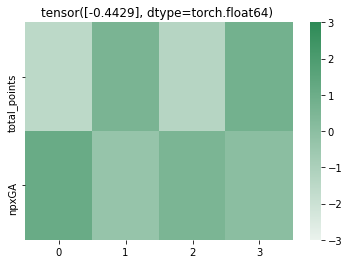

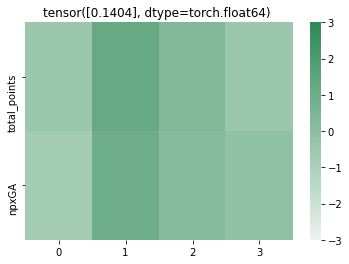

In [8]:
bruno = [player for player in players if "Bruno Miguel" in player.name][0]
#bruno.visualize()
train_loader, test_loader, _ = get_training_datasets([bruno], teams, visualize=False, autoregressive=True)
for player_features, total_points in train_loader:
    for player_feature, total_point in zip(player_features, total_points):
        #predicted_score = (player_feature * opponent_feature).sum()
        plt.title(f"{total_point} ")
        sns.heatmap(player_feature, yticklabels = player_feature_names + team_feature_names, cmap = sns.light_palette("seagreen", as_cmap = True), vmin=-3, vmax=3)
        plt.show()
        #sns.heatmap(opponent_feature.reshape((1, 4)), yticklabels=team_feature_names,   cmap = sns.light_palette("seagreen", as_cmap = True), vmin=-3, vmax=3)
        #plt.show()
        